<a href="https://colab.research.google.com/github/StephanyChanelo/IntroduccionCienciasPlanetarias/blob/main/Python_for_astronomers5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Python para ciencias espaciales**
##ENES, Unidad Morelia
Introducción a las ciencias planetarias


Un tipo común de visualización en la ciencia de datos es el de los datos geográficos. La herramienta principal de Matplotlib para este tipo de visualización es el kit de herramientas Basemap, que es uno de varios kits de herramientas de Matplotlib que se encuentran bajo el espacio de nombres mpl_toolkits.

Basemap facilita la conversión a múltiples proyecciones cartográficas, el uso de cartografía base como referencia espacial sin tener que cargarla manualmente de fuentes externas y permite realizar composiciones y visualizaciones algo más avanzadas.

In [131]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
%matplotlib inline
import numpy as np
import pandas as pd # linear algebra
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Lo útil es que el globo que se muestra aquí no es una mera imagen; ¡Es un eje de Matplotlib completamente funcional que comprende coordenadas esféricas y que nos permite sobretrazar fácilmente datos en el mapa!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


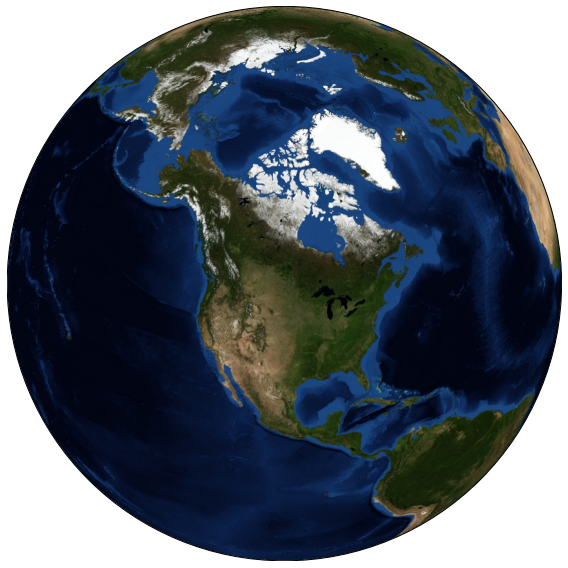

In [133]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

**Proyecciones**

Lo primero que debe decidir al usar mapas es qué proyección usar. Estas proyecciones se han desarrollado a lo largo de la historia humana, ¡y hay muchas opciones! Dependiendo del uso previsto de la proyección del mapa, hay ciertas características del mapa (p. ej., dirección, área, distancia, forma u otras consideraciones) que es útil mantener.


In [134]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

El paquete Basemap implementa varias docenas de tales proyecciones, todas referenciadas por un código de formato corto. Aquí demostraremos brevemente algunos de los más comunes.

Comenzaremos definiendo una rutina de conveniencia para dibujar nuestro mapa mundial junto con las líneas de longitud y latitud:

**Proyección cilíndrica**

Las proyecciones cartográficas más simples son las proyecciones cilíndricas, en las que las líneas de latitud y longitud constantes se asignan a líneas horizontales y verticales, respectivamente. Este tipo de mapeo representa bastante bien las regiones ecuatoriales, pero produce distorsiones extremas cerca de los polos. El espaciado de las líneas de latitud varía entre diferentes proyecciones cilíndricas, lo que lleva a diferentes propiedades de conservación y diferentes distorsiones cerca de los polos. En la siguiente figura mostramos un ejemplo de la proyección cilíndrica equidistante, que elige una escala de latitud que preserva las distancias a lo largo de los meridianos. Otras proyecciones cilíndricas son las proyecciones de Mercator (projection='merc') y de áreas iguales cilíndricas (projection='cea').

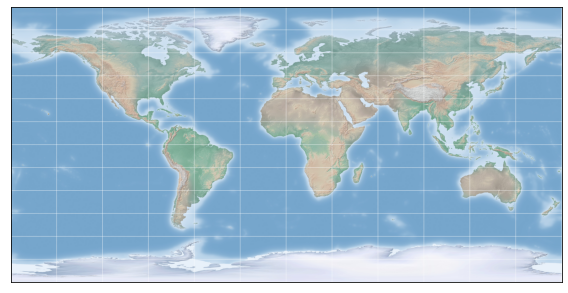

In [135]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

**Proyección pseudo-cilíndrica**

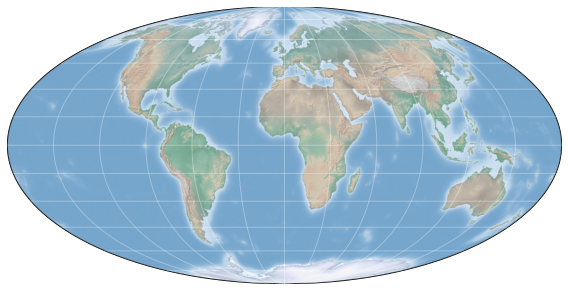

In [136]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

**Proyección cónica**

Una proyección cónica proyecta el mapa en un solo cono, que luego se desenrolla. Esto puede generar muy buenas propiedades locales, pero las regiones alejadas del punto de enfoque del cono pueden distorsionarse mucho. Un ejemplo de esto es la proyección cónica conforme de Lambert (projection='lcc'), que vimos anteriormente en el mapa de América del Norte. Proyecta el mapa en un cono dispuesto de tal manera que dos paralelos estándar (especificados en Basemap por lat_1 y lat_2) tienen distancias bien representadas, con una escala que disminuye entre ellos y aumenta fuera de ellos. Otras proyecciones cónicas útiles son la proyección cónica equidistante (projection='eqdc') y la proyección de áreas equivalentes de Albers (projection='aea'). Las proyecciones cónicas, como las proyecciones en perspectiva, tienden a ser buenas opciones para representar partes pequeñas o medianas del globo.

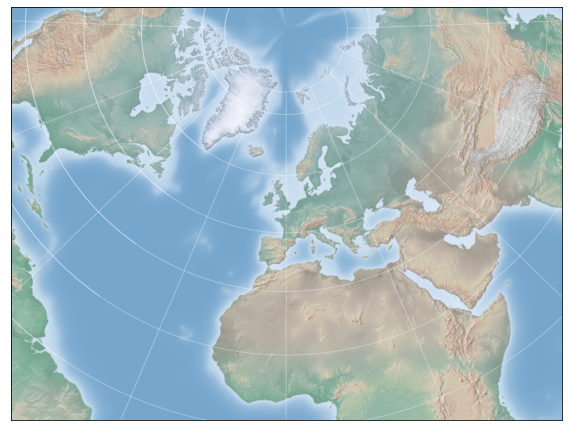

In [153]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

**Graficar datos sobre el mapa**

Por ejemplo, podemos usar una proyección de mapa diferente, acercarnos a América y trazar la ubicación de CDMX. Usaremos una imagen etopo (que muestra características topográficas tanto en tierra como bajo el océano) como fondo del mapa:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


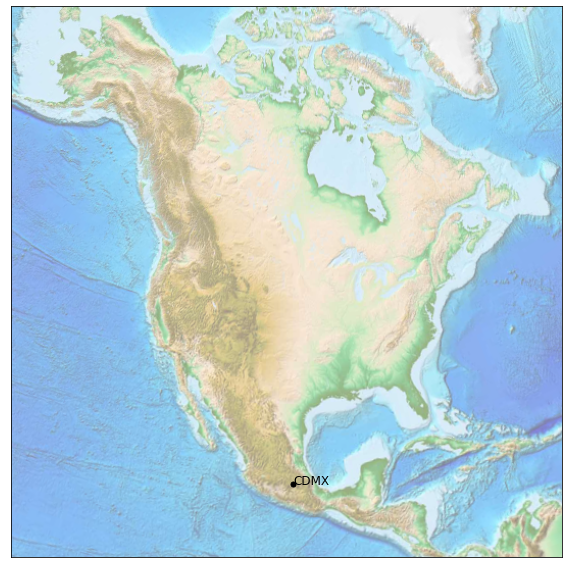

In [138]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-99.12766, 19.42847)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'CDMX', fontsize=12);


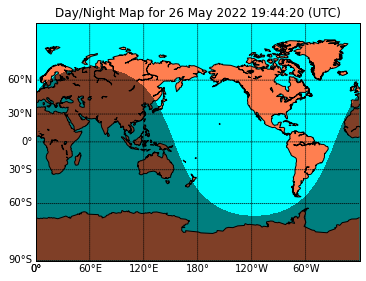

In [137]:
from datetime import datetime
# miller projection
map = Basemap(projection='mill',lon_0=180)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
date = datetime.utcnow()
CS=map.nightshade(date)
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()

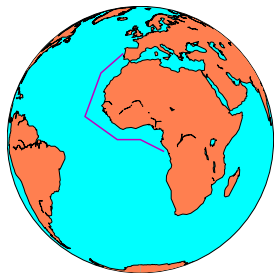

In [139]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

lons = [-10, -20, -25, -10, 0, 10]
lats = [40, 30, 10, 0, 0, -5]

x, y = map(lons, lats)

map.plot(x, y, marker=None,color='m')

plt.show()

***Insert locator*** es una clase genial que hace zoom en una parte del gráfico y la dibuja en el gráfico mismo, mostrando la zona ampliada.


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


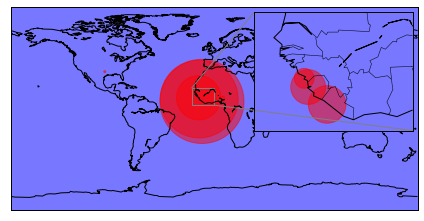

In [154]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

map = Basemap(projection='cyl', 
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='#7777ff')
map.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
map.drawcoastlines()

lons = np.array([-13.7, -10.8, -13.2, -96.8, -7.99, 7.5, -17.3, -3.7])
lats = np.array([9.6, 6.3, 8.5, 32.7, 12.5, 8.9, 14.7, 40.39])
cases = np.array([1971, 7069, 6073, 4, 6, 20, 1, 1])
deaths = np.array([1192, 2964, 1250, 1, 5, 8, 0, 0])
places = np.array(['Guinea', 'Liberia', 'Sierra Leone','United States', 'Mali', 'Nigeria', 'Senegal', 'Spain'])

x, y = map(lons, lats)

map.scatter(x, y, s=cases, c='r', alpha=0.5)

axins = zoomed_inset_axes(ax, 7, loc=1)
axins.set_xlim(-20, 0)
axins.set_ylim(3, 18)

plt.xticks(visible=False)
plt.yticks(visible=False)

map2 = Basemap(llcrnrlon=-20,llcrnrlat=3,urcrnrlon=0,urcrnrlat=18, ax=axins)
map2.drawmapboundary(fill_color='#7777ff')
map2.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
map2.drawcoastlines()
map2.drawcountries()

map2.scatter(x, y, s=cases/5., c='r', alpha=0.5)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

Para más ejemplos: 
* https://matplotlib.org/basemap/users/examples.html
* https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac
https://basemaptutorial.readthedocs.io/en/latest/locator.html
* https://www.geomapik.com/desarrollo-programacion-gis/como-generar-mapas-python-matplotlib-basemap/

##**SISMOS**

In [141]:
data = pd.read_csv("https://raw.githubusercontent.com/StephanyChanelo/IntroduccionCienciasPlanetarias/main/Data/database.csv")
data = data.drop([3378,7512,20650])
data["year"]= [int(each.split("/")[2]) for each in data.iloc[:,0]]

In [142]:
data.head(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,year
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965


In [143]:
data.Type.unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [144]:
dataset = data.loc[:,["Date","Latitude","Longitude","Type","Depth","Magnitude","year"]]
dataset.head()

,Date,Latitude,Longitude,Type,Depth,Magnitude,year
0,01/02/1965,19.246,145.616,Earthquake,131.6,6.0,1965
1,01/04/1965,1.863,127.352,Earthquake,80.0,5.8,1965
2,01/05/1965,-20.579,-173.972,Earthquake,20.0,6.2,1965
3,01/08/1965,-59.076,-23.557,Earthquake,15.0,5.8,1965
4,01/09/1965,11.938,126.427,Earthquake,15.0,5.8,1965


In [145]:
d=dataset[dataset["year"]==1985]
d

,Date,Latitude,Longitude,Type,Depth,Magnitude,year
7347,01/02/1985,55.428,-157.835,Earthquake,33.3,6.0,1985
7348,01/02/1985,-14.658,-175.353,Earthquake,33.0,5.7,1985
7349,01/03/1985,-21.616,-174.110,Earthquake,33.0,5.6,1985
7350,01/04/1985,-26.057,-177.518,Earthquake,132.7,5.8,1985
7351,01/05/1985,-0.666,67.290,Earthquake,10.0,5.6,1985
...,...,...,...,...,...,...,...
7818,12/28/1985,-13.192,166.507,Earthquake,36.0,6.3,1985
7819,12/28/1985,-5.801,104.288,Earthquake,33.0,6.2,1985
7820,12/30/1985,-5.546,150.686,Earthquake,113.0,6.1,1985
7821,12/30/1985,61.541,-150.340,Earthquake,62.1,5.5,1985


In [146]:
# Extract the data we're interested in
lat = d['Latitude'].values
lon = d['Longitude'].values
mag = d['Magnitude'].values
dep = d['Depth'].values

In [147]:
[mini, prom, maxi] = np.min(mag), np.mean(mag), np.max(mag)
mini, prom, maxi

(5.5, 5.895494736842105, 8.0)

**Qúe se está graficando en el siguiente mapa?**

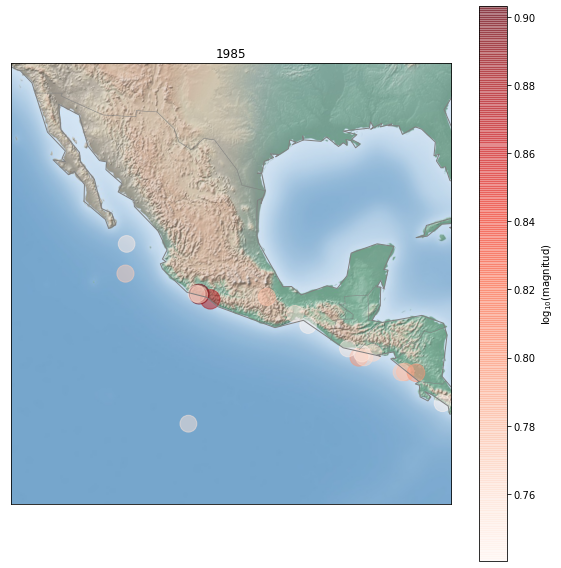

In [148]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
plt.title("1985")
m = Basemap(projection='lcc', resolution='c', 
            lat_0=19, lon_0=-100,
            width=3.7E6, height=3.7E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

# 2. scatter the earthquake, with color reflecting the magnitude

m.scatter(lon, lat, latlon=True,
          c=np.log10(mag), s=50*mag,
          cmap='Reds', alpha=0.5)

# 3. create colorbar
plt.colorbar(label=r'$\log_{10}({\rm magnitud})$')
#plt.clim(mini, maxi)

**Energía liberada por un sismo**

La magnitud de un sismo es un parámetro que cuantifica la liberación de energía de deformación que ocurre durante un terremoto. Esta puede compararse a la energía que se almacena en un resorte cuando lo estiramos o comprimimos. Cuando soltamos el resorte, esta energía elástica (o potencial) se transforma en cinética (y parte en energía térmica).

La cantidad de energía asociada a un sismo se calcula según una ecuación empírica propuesta originalmente por Charles F. Richter (1900-1985).La ecuación que relaciona
energía y magnitud es:

\begin{equation}
log_{10}(E_{s}) = 11.8 + 1.5 M
\end{equation}

Cuando se usa esa fórmula y se despeja la energía $E_s$, esta se obtiene en una unidad que no es muy común
en la ingeniería llamada “erg”.


\begin{equation}
E_{s} = 10^{11.8+1.5M}
\end{equation}


A veces se suele comparar esta energía a aquella liberada por una explosión
de megatoneladas de TNT . Por ejemplo, la energía liberada por la bomba atómica de Hiroshima fue de
0.016 megatones de TNT que es comparable a la que se liberó durante la réplica del 12 de enero de 2020
del sismo del 7 de enero.

Vamos a calcular la diferencia en energía liberada durante dos eventos: el de M 5.8 del 6 de enero y el
de M 6.4 el 7 de enero de 2020. Reemplazando primero M = 6.4 en la ecuación de Richter y luego M =
5.8 se obtiene:


In [149]:
def earthquake_energy(earthquake_magnitude):
  E=10**(11.8+1.5*(earthquake_magnitude))
  return E

def ratio_energy(magnitude1, magnitude2):
  E_1 = 10**(11.8+1.5*6.4)
  E_2 = 10**(11.8+1.5*5.8)

  r= E_1/E_2
  return r

In [150]:
ratio_energy(6.4, 5.8)

7.943282347242855

Sustituyendo en la ecuación de Richter:

\begin{equation}
log_{10}(E_{6.4}) = 11.8 + 1.5*6.4
\end{equation}

\begin{equation}
log_{10}(E_{5.8}) = 11.8 + 1.5*5.8
\end{equation}

Restando las dos ecuaciones y usando la propiedad de la resta de logaritmos se llega a:

\begin{equation}
log_{10}(\frac{E_{6.4}}{E_{5.8}}) = 0.9
\end{equation}

Despejando la $E_{6.4}$ en función de E_{5.8} se obtiene:


\begin{equation}
E_{6.4} = 7.943E_{5.8}
\end{equation}

O sea que el sismo del 7 de enero liberó 7.943 veces más energía que el del 6 de enero.

La siguiente gráfica presente en escala logarítmica la diferencia en energía liberada entre sismos de
magnitud 3 a 8. La escala está normalizada respecto a la energía de un sismo de magnitud 3.

**Cuál es la diferencia entre un sismo de magnitud 3 a uno de 5?**


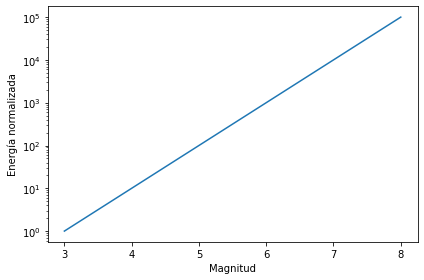

In [151]:
magn = np.linspace(3,8, 6)
e_norm = [1, 10, 100, 1000, 10**4, 10**5]

plt.plot(magn, e_norm)
plt.xlabel('Magnitud')
plt.ylabel('Energía normalizada')
plt.yscale('log')
plt.show()

Si se cambia el gráfico a escala normal es posible observar que la energía aumenta relativamente poco hasta que llegamos a M 5:

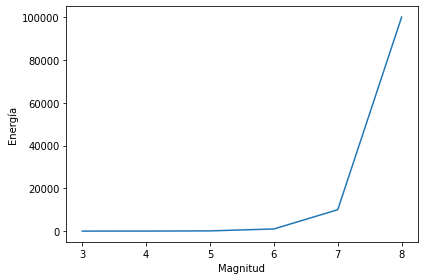

In [152]:
plt.plot(magn, e_norm)
plt.xlabel('Magnitud')
plt.ylabel('Energía')
plt.show()